In [100]:
import numpy as np
import pandas as pd
import xarray as xr

import geopandas
import geodatasets

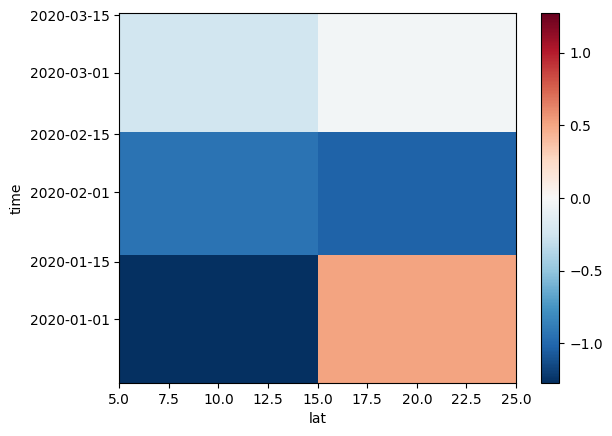

In [101]:
data = xr.DataArray(
    np.random.randn(3,2,3),
    dims = ("time", "lat", "lon"),
    coords = {
        "lat": [10,20],
        "time": pd.date_range(
            "2020-01", periods = 3, freq = "MS"
        ),
    },
)

data[0,:]
data.loc[:,10]
data.isel(lat=0)
data.sel(time="2020-01")
data.mean(dim=["time", "lat"])
data.isel(lon=0).plot();

In [102]:
import rasterio
import rasterio.features
import rasterio.warp

In [103]:
with rasterio.open('/Users/ryjoshi/Downloads/ECO4WUE.001_Water_Use_Efficiency_WUEavg_doy2022156184219_aid0001.tif') as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        '''geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)'''

        # Print GeoJSON shapes to stdout.
        print(dataset.crs)
        print(geom)

EPSG:4326
{'type': 'Polygon', 'coordinates': [[(-107.59926127361543, 33.92017962887676), (-107.59926127361543, 33.69800872874066), (-107.39728772803716, 33.69800872874066), (-107.39728772803716, 33.92017962887676), (-107.59926127361543, 33.92017962887676)]]}


In [104]:
dataset = rasterio.open('/Users/ryjoshi/Downloads/ECO4WUE.001_Water_Use_Efficiency_WUEavg_doy2022156184219_aid0001.tif')
dataset.name

'/Users/ryjoshi/Downloads/ECO4WUE.001_Water_Use_Efficiency_WUEavg_doy2022156184219_aid0001.tif'

In [105]:
dataset.count

1

In [106]:
dataset.width

320

In [107]:
dataset.height

352

In [108]:
dataset.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [109]:
dataset.xy(dataset.height // 2, dataset.width // 2)

(np.float64(-107.49795891716133), np.float64(33.80877859514374))

In [110]:
from rasterio.transform import from_gcps
from rasterio.control import GroundControlPoint

In [111]:
with rasterio.open('/Users/ryjoshi/Downloads/20250330_reprojected_extent.tif') as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    tl = GroundControlPoint(0, 0, -107.598782, 33.919679)
    bl = GroundControlPoint(0, 60, -107.3974, 33.919679)
    br = GroundControlPoint(45, 60, -107.3974, 33.698067)
    tr = GroundControlPoint(45, 0, -107.598782, 33.698067)
    gcps = [tl, bl, br, tr]

    transform = from_gcps(gcps)
    crs = 'epsg:4326'

    print(dataset.crs)
    print(geom)

'''with rasterio.open(filepath, 'r+') as ds:
    ds.crs = crs
    ds.transform = transform

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)
        
        # Print GeoJSON shapes to stdout.
        print(dataset.crs)
        print(geom)'''

None
{'type': 'Polygon', 'coordinates': [[(-107.59926127361543, 33.92017962887676), (-107.59926127361543, 33.69800872874066), (-107.39728772803716, 33.69800872874066), (-107.39728772803716, 33.92017962887676), (-107.59926127361543, 33.92017962887676)]]}


/Users/ryjoshi/miniforge3/lib/python3.10/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


"with rasterio.open(filepath, 'r+') as ds:\n    ds.crs = crs\n    ds.transform = transform\n\n    # Extract feature shapes and values from the array.\n    for geom, val in rasterio.features.shapes(\n            mask, transform=dataset.transform):\n\n        # Transform shapes from the dataset's own coordinate\n        # reference system to CRS84 (EPSG:4326).\n        geom = rasterio.warp.transform_geom(\n            dataset.crs, 'EPSG:4326', geom, precision=6)\n        \n        # Print GeoJSON shapes to stdout.\n        print(dataset.crs)\n        print(geom)"

In [112]:
test_path = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20240406_ET.tif"

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data >= 32700, np.nan, data)
    print(data)

[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan       nan       nan ... 152.39233 161.00047       nan]
 [      nan       nan       nan ... 144.40862 168.88841       nan]
 [      nan       nan       nan ... 139.04951 144.65076 166.00804]]


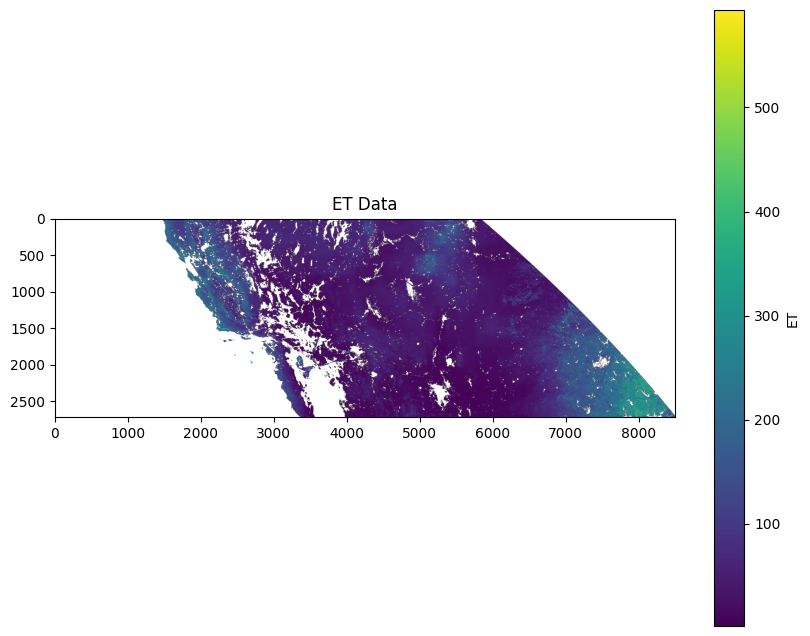

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(data)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

In [114]:
test_path = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_PET.tif"

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data >= 32700, np.nan, data)
    print(data)

[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan       nan       nan ... 405.08334 402.14795       nan]
 [      nan       nan       nan ... 402.9377  397.6011        nan]
 [      nan       nan       nan ... 403.94223 397.40744 402.252  ]]


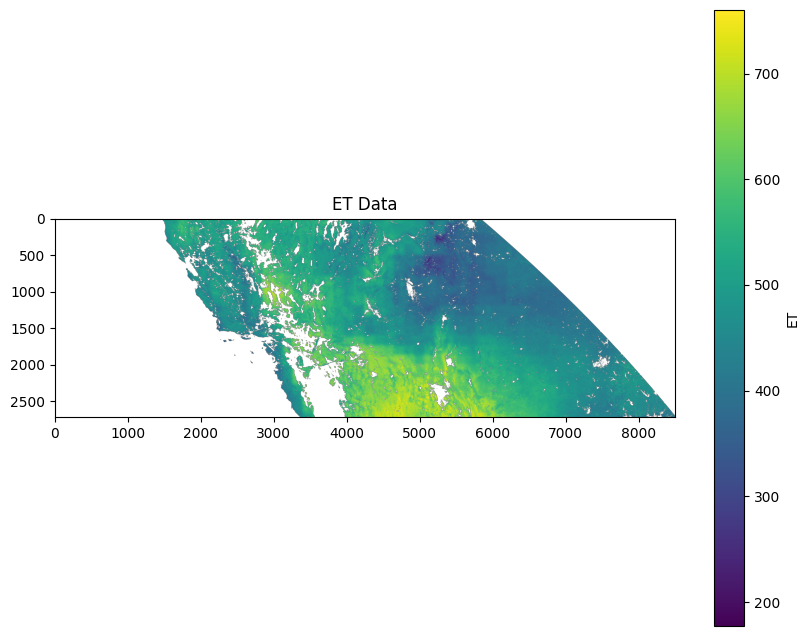

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(data)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

In [116]:
day = int(input("What day would you like to see ET data for? (1, 9, 17, or 25)"))

str_day = str(day)

if day < 10:
    str_day = "0" + str(day)

print(str_day)

What day would you like to see ET data for? (1, 9, 17, or 25) 1


01


In [117]:
test_path = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_202505" + str_day + "_ET.tif"

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data >= 32700, np.nan, data)
    print(data)

[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan       nan       nan ... 168.93706 179.7783        nan]
 [      nan       nan       nan ... 159.92322 184.7172        nan]
 [      nan       nan       nan ... 151.26404 181.13739 168.1193 ]]


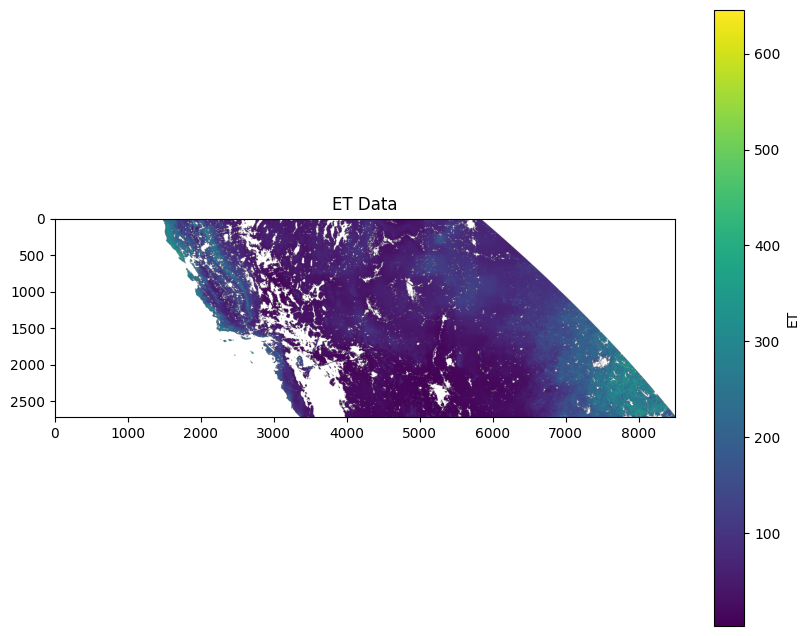

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(data)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

What day would you like to see ET data for? (enter a number between 1 and 28) 4


01
[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan       nan       nan ... 168.93706 179.7783        nan]
 [      nan       nan       nan ... 159.92322 184.7172        nan]
 [      nan       nan       nan ... 151.26404 181.13739 168.1193 ]]


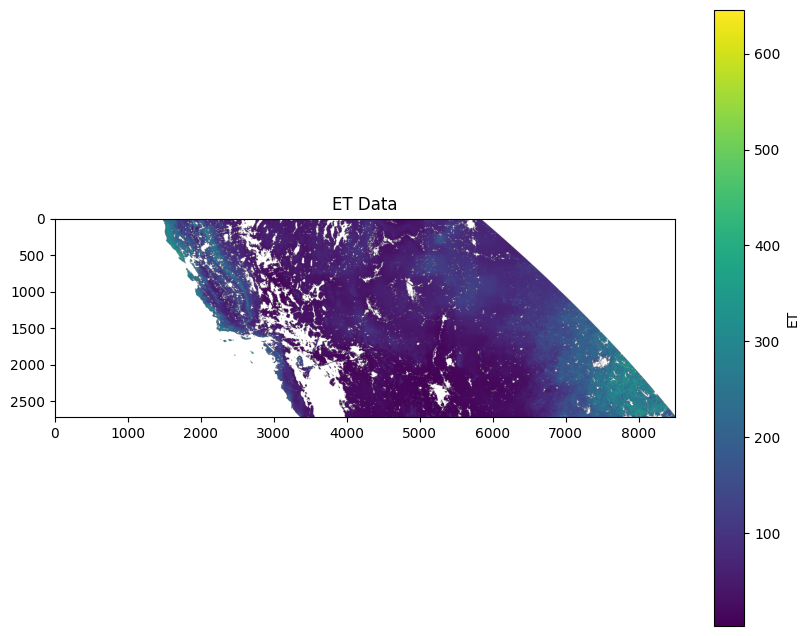

In [119]:
day = int(input("What day would you like to see ET data for? (enter a number between 1 and 28)"))

if day%8 < 5:
    day = 8 * (int(day/8)) + 1
else:
    day = 8 * (int(day/8)) + 9

str_day = str(day)

if day < 10:
    str_day = "0" + str(day)

print(str_day)

test_path = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_202505" + str_day + "_ET.tif"

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data >= 32700, np.nan, data)
    print(data)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(data)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan       nan       nan ... 168.93706 179.7783        nan]
 [      nan       nan       nan ... 159.92322 184.7172        nan]
 [      nan       nan       nan ... 151.26404 181.13739 168.1193 ]]
[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan       nan       nan ... 425.21954 439.48242       nan]
 [      nan       nan       nan ... 420.18423 452.71976       nan]
 [      nan       nan       nan ... 400.2558  429.19562 415.24396]]
[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan     

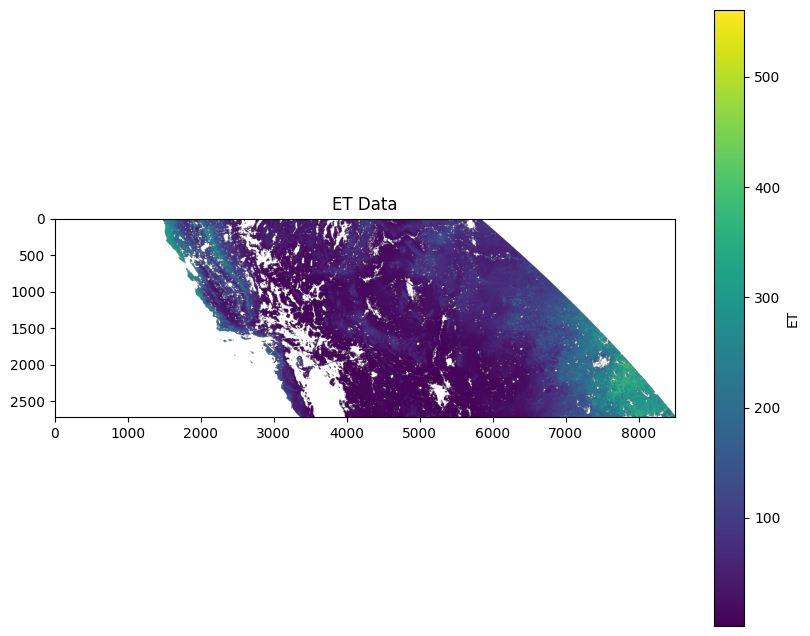

In [120]:
test_path = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif"
test_path_2 = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250509_ET.tif"
test_path_3 = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250517_ET.tif"
test_path_4 = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250525_ET.tif"

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data >= 32700, np.nan, data)
    print(data)

    with rasterio.open(test_path_2) as src:
        data += src.read(1)
        data = np.where(data >= 32700, np.nan, data)
        print(data)

        with rasterio.open(test_path_3) as src:
            data += src.read(1)
            data = np.where(data >= 32700, np.nan, data)
            print(data)

            with rasterio.open(test_path_4) as src:
                data += src.read(1)
                data = np.where(data >= 32700, np.nan, data)
                data = data/4
                print(data)
        
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(data)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan       nan       nan ... 234.17603 233.8154        nan]
 [      nan       nan       nan ... 274.5094  265.181         nan]
 [      nan       nan       nan ... 226.      226.      243.5067 ]]
[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan       nan       nan ... 468.7456  470.18555       nan]
 [      nan       nan       nan ... 519.0672  498.721         nan]
 [      nan       nan       nan ... 467.0165  468.8836  482.13   ]]
[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan     

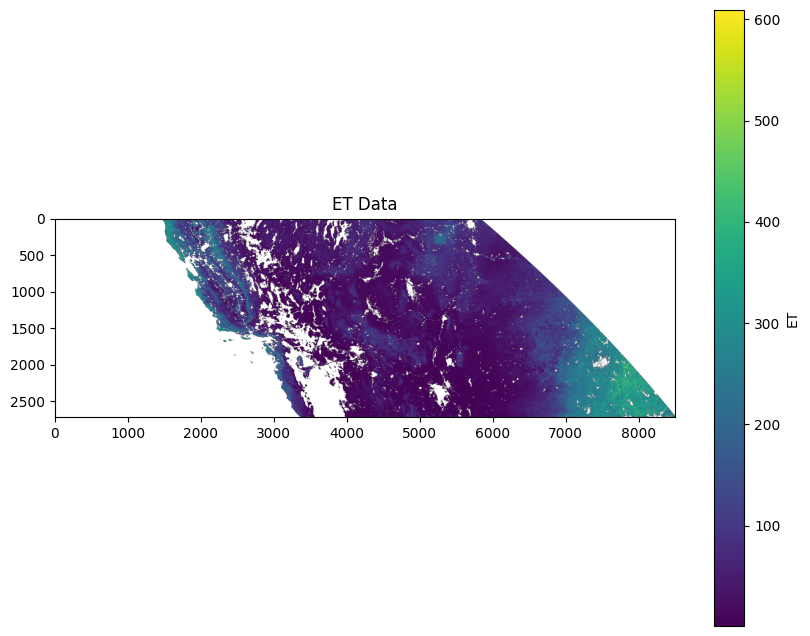

In [121]:
test_path = "/Applications/MODIS_S3_downloads/MOD16A2_MERGED_20240508_ET.tif"
test_path_2 = "/Applications/MODIS_S3_downloads/MOD16A2_MERGED_20240516_ET.tif"
test_path_3 = "/Applications/MODIS_S3_downloads/MOD16A2_MERGED_20240524_ET.tif"

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data >= 32700, np.nan, data)
    print(data)

    with rasterio.open(test_path_2) as src:
        data += src.read(1)
        data = np.where(data >= 32700, np.nan, data)
        print(data)

        with rasterio.open(test_path_3) as src:
            data += src.read(1)
            data = np.where(data >= 32700, np.nan, data)
            data = data/3
            print(data)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(data)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan       nan       nan ... 327.54184 326.40723       nan]
 [      nan       nan       nan ... 327.7149  322.6867        nan]
 [      nan       nan       nan ... 326.0165  327.88358 326.24933]]


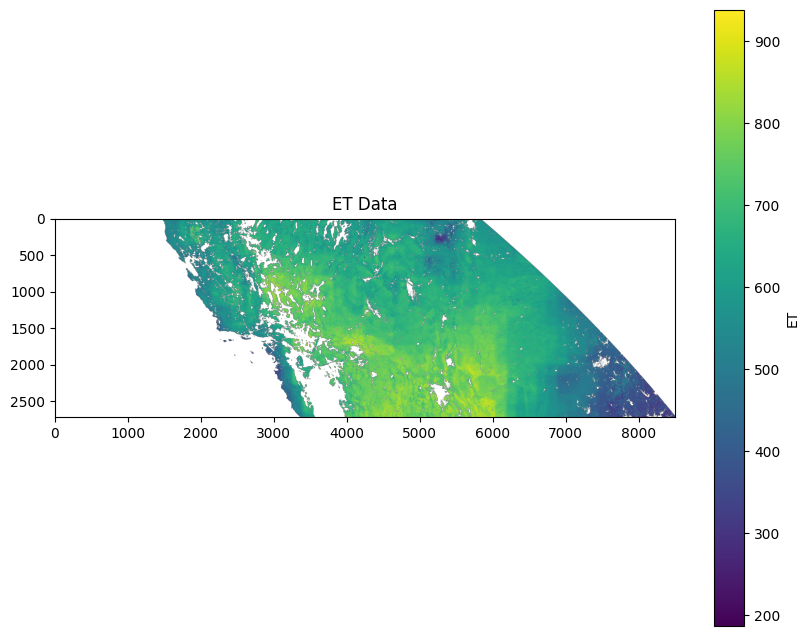

In [122]:
test_path = "/Applications/MODIS_S3_downloads/MOD16A2_MERGED_20240516_PET.tif"

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data >= 32700, np.nan, data)
    print(data)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(data)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

In [123]:
'''day = 1

for day <= 31:

    str_day = str(day)
    if day < 10:
        str_day = "0" + str(day)
    print(str_day)

    test_path = "/Applications/MODIS_S3_downloads/MOD16A2_MERGED_202405" + str(day) + "_ET.tif"
    test_path_2 = "/Applications/MODIS_S3_downloads/MOD16A2_MERGED_202405" + str(day) + "_ET.tif"
    test_path_3 = "/Applications/MODIS_S3_downloads/MOD16A2_MERGED_202405" + str(day) + "_ET.tif"

    with rasterio.open(test_path) as src:
        data = src.read(1)
        data = np.where(data >= 32700, np.nan, data)
        print(data)

    with rasterio.open(test_path_2) as src:
        data += src.read(1)
        data = np.where(data >= 32700, np.nan, data)
        print(data)

    with rasterio.open(test_path_3) as src:
        data += src.read(1)
        data = np.where(data >= 32700, np.nan, data)
        data = data/3
        print(data)

    day += 1'''

'day = 1\n\nfor day <= 31:\n\n    str_day = str(day)\n    if day < 10:\n        str_day = "0" + str(day)\n    print(str_day)\n\n    test_path = "/Applications/MODIS_S3_downloads/MOD16A2_MERGED_202405" + str(day) + "_ET.tif"\n    test_path_2 = "/Applications/MODIS_S3_downloads/MOD16A2_MERGED_202405" + str(day) + "_ET.tif"\n    test_path_3 = "/Applications/MODIS_S3_downloads/MOD16A2_MERGED_202405" + str(day) + "_ET.tif"\n\n    with rasterio.open(test_path) as src:\n        data = src.read(1)\n        data = np.where(data >= 32700, np.nan, data)\n        print(data)\n\n    with rasterio.open(test_path_2) as src:\n        data += src.read(1)\n        data = np.where(data >= 32700, np.nan, data)\n        print(data)\n\n    with rasterio.open(test_path_3) as src:\n        data += src.read(1)\n        data = np.where(data >= 32700, np.nan, data)\n        data = data/3\n        print(data)\n\n    day += 1'

[[         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]
 ...
 [         nan          nan          nan ... 237.60923767 236.65445455
           nan]
 [         nan          nan          nan ... 260.39298503 251.27308655
           nan]
 [         nan          nan          nan ... 237.32233175 236.07761129
  250.29714457]]
[[         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]
 ...
 [         nan          nan          nan ... 386.31615194 383.09863281
           nan]
 [         nan          nan          nan ... 383.96601359 381.08758545
           nan]
 [         nan          nan     

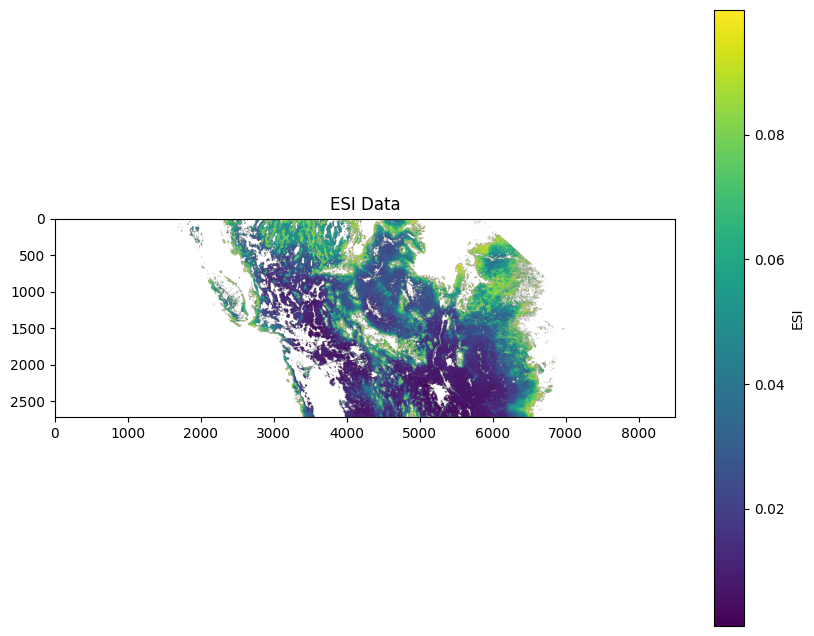

In [124]:
import os
all_files = os.listdir("/Applications/MODIS_S3_downloads")

monthly_files = []

for filename in all_files:
    if "202405" in filename and "_ET" in filename:
        monthly_files.append(filename)

monthly_files

#better to rely on some kind of reference -- load an image, get the dimensions of that image, and compare that to everything else
data = np.zeros((2725, 8496))

for file in monthly_files:
    test_path = "/Applications/MODIS_S3_downloads/" + file
    with rasterio.open(test_path) as src:
        data += src.read(1)
        data = np.where(data >= 32700, np.nan, data)
        #print(data)

data /= len(monthly_files)
print(data)


pet_files = []

for filename in all_files:
    if "202405" in filename and "PET" in filename:
        pet_files.append(filename)

pet_data = np.zeros((2725, 8496))

for file in pet_files:
    test_path = "/Applications/MODIS_S3_downloads/" + file
    with rasterio.open(test_path) as src:
        pet_data += src.read(1)
        pet_data = np.where(pet_data >= 32700, np.nan, pet_data)
        #print(data)

pet_data /= len(pet_files)
print(pet_data)

#each ET or PET file is an 8 day average
esi_data = data/pet_data
esi_data = np.where(esi_data >= 0.1, np.nan, esi_data)
print(esi_data)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(esi_data)
plt.colorbar(label='ESI')
plt.title('ESI Data')
plt.show()

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


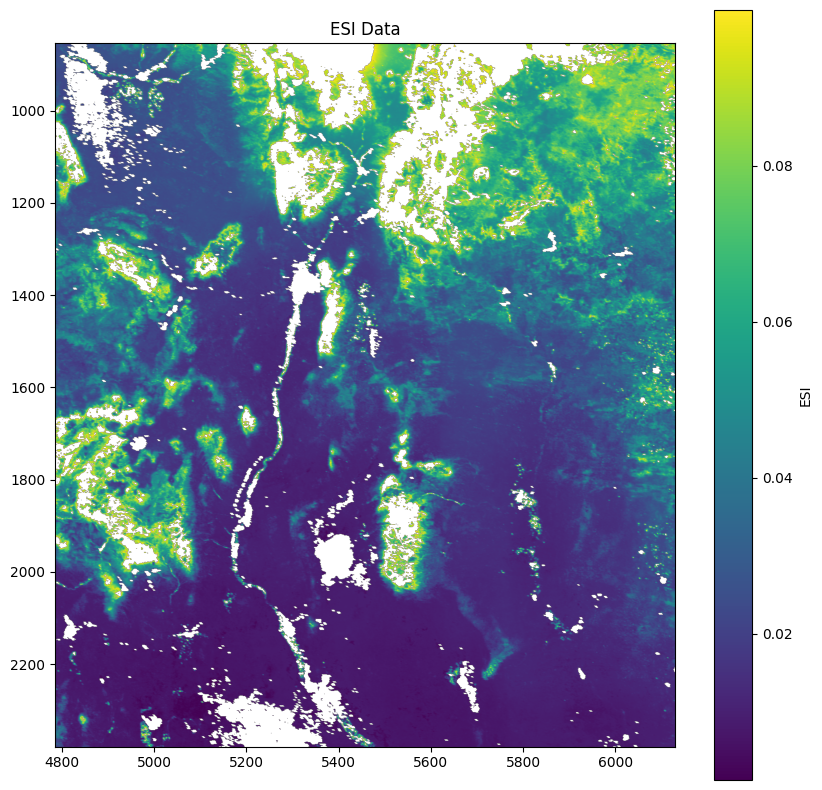

In [125]:
test_path = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif"

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data >= 32700, np.nan, data)
    #print(data)

test_path_2 = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_PET.tif"

with rasterio.open(test_path_2) as src:
    data2 = src.read(1)
    data2 = np.where(data2 >= 32700, np.nan, data2)
    #print(data2)

esi = data/data2
esi = np.where(esi > 0.1, np.nan, esi)
print(esi)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(esi_data)
plt.colorbar(label='ESI')
plt.title('ESI Data')
plt.xlim(4785,6129)
plt.ylim(2379,854)
plt.show()

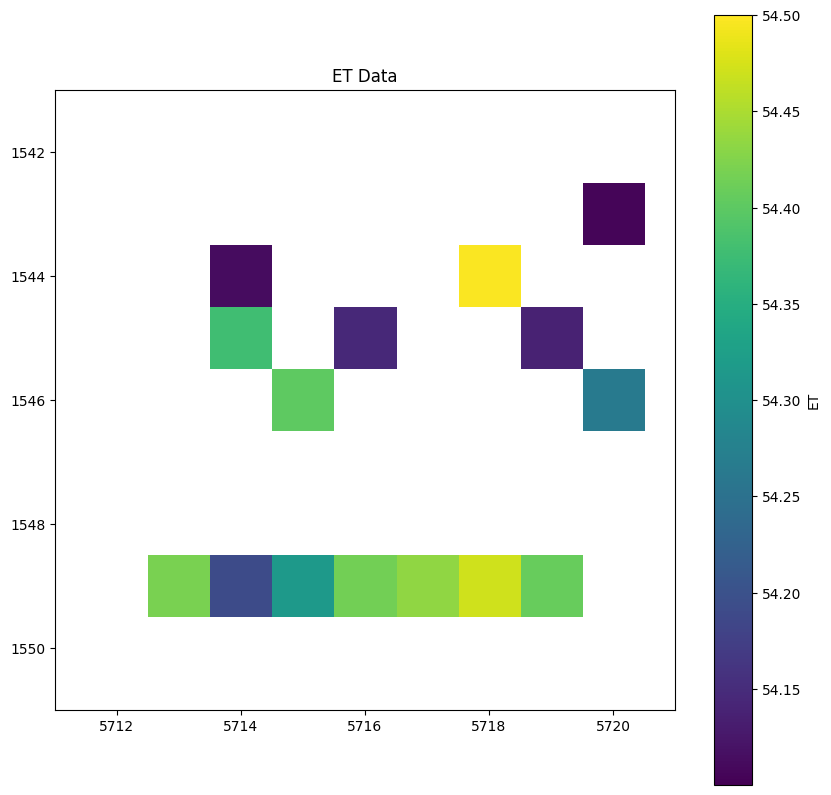

In [126]:
test_path = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif"

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data > 54.5, np.nan, data)
    data = np.where(data < 54.1, np.nan, data)
    #print(data)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(data)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.xlim(5711,5721)
plt.ylim(1551,1541)
plt.show()

In [127]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from geodatasets import get_path

#geopandas.GeoDataFrame("/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif")

In [128]:
#! means "run this python environment in the jupyter notebook it's in (basically a shell command)
!pip install geopandas

In [129]:
import rioxarray

In [130]:
import xarray
xds = xarray.open_dataset("/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif", engine="rasterio")

In [131]:
from affine import Affine

In [132]:
rds = xarray.open_dataset("/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif", decode_coords="all")
rds.rio.crs

CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]')

In [133]:
xda = xarray.DataArray(1)
xda.rio.write_crs(4326, inplace=True)
xda.spatial_ref

<xarray.DataArray 'spatial_ref' ()> Size: 8B
array(0)
Coordinates:
    spatial_ref  int64 8B 0
Attributes:
    crs_wkt:                      GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    semi_major_axis:              6378137.0
    semi_minor_axis:              6356752.314245179
    inverse_flattening:           298.257223563
    reference_ellipsoid_name:     WGS 84
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          WGS 84
    horizontal_datum_name:        World Geodetic System 1984
    grid_mapping_name:            latitude_longitude
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...

In [134]:
xda.rio.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [135]:
rds.rio.write_crs(4326, inplace=True)
#rds.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
rds.rio.write_coordinate_system(inplace=True)

rds = rds.rename(x="longitude", y="latitude")

In [136]:
transform = Affine(3.0, 0.0, 466266.0, 0.0, -3.0, 8084700.0)
xda.rio.write_transform(transform, inplace=True)
xda.spatial_ref.GeoTransform

'466266.0 3.0 0.0 8084700.0 0.0 -3.0'

In [137]:
xda.rio.transform()

Affine(3.0, 0.0, 466266.0,
       0.0, -3.0, 8084700.0)

In [138]:
import urllib
import geojson

In [139]:
geometry = ''' {"type": "Polygon",
               "coordinates": [
                [[-109.05, 31.333],
                [-109.05, 36.999],
                 [-103, 36.999],
                [-103, 31.333]]]}'''

cropping_geometries = [geojson.loads(geometry)]
xds = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif')
cropped = xds.rio.clip(geometries=cropping_geometries, crs=4326)

In [140]:
cropped

<xarray.DataArray (band: 1, y: 1526, x: 1347)> Size: 8MB
array([[[56.05772  , 56.702312 , 56.70582  , ..., 81.643105 ,
         81.7709   , 82.24886  ],
        [55.311386 , 55.770554 , 56.228333 , ..., 82.565765 ,
         82.62166  , 83.73735  ],
        [55.013046 , 55.254257 , 55.906826 , ..., 82.24882  ,
         82.425995 , 82.98256  ],
        ...,
        [13.702225 , 13.607969 , 14.792874 , ..., 15.7801075,
         17.137785 , 17.75787  ],
        [15.758725 , 14.838384 , 13.789731 , ..., 15.920914 ,
         17.08932  , 17.68497  ],
        [15.607399 , 17.527592 , 17.061396 , ..., 15.820736 ,
         17.021313 , 17.478968 ]]], shape=(1, 1526, 1347), dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 11kB -1.214e+07 -1.214e+07 ... -1.147e+07
  * y            (y) float64 12kB 4.439e+06 4.438e+06 ... 3.677e+06 3.676e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    _FillValue:     32700.0

TypeError: Invalid shape (1, 1526, 1347) for image data

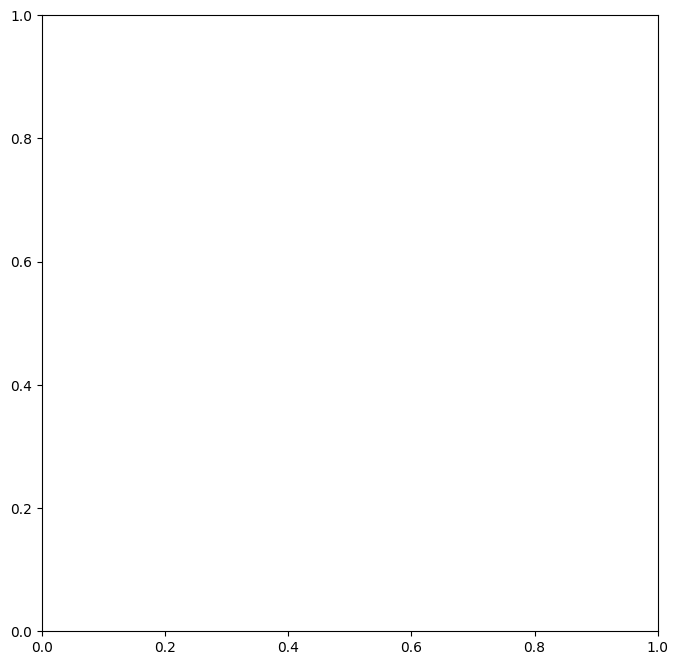

In [141]:
#import rasterio
#import rasterio.features
#import rasterio.warp

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(cropped)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

In [142]:
def valid_imshow_data(data):
    data = np.asarray(data)
    if data.ndim == 2:
        return True
    elif data.ndim == 3:
        if 3 <= data.shape[2] <= 4:
            return True
        else:
            print('The "data" has 3 dimensions but the last dimension '
                  'must have a length of 3 (RGB) or 4 (RGBA), not "{}".'
                  ''.format(data.shape[2]))
            return False
    else:
        print('To visualize an image the data must be 2 dimensional or '
              '3 dimensional, not "{}".'
              ''.format(data.ndim))
        return False

valid_imshow_data(cropped)

cropped.ndim

The "data" has 3 dimensions but the last dimension must have a length of 3 (RGB) or 4 (RGBA), not "1347".


3

In [143]:
if cropped.shape[0] == 1:
    cropped = cropped[0, :, :]

cropped.ndim

2

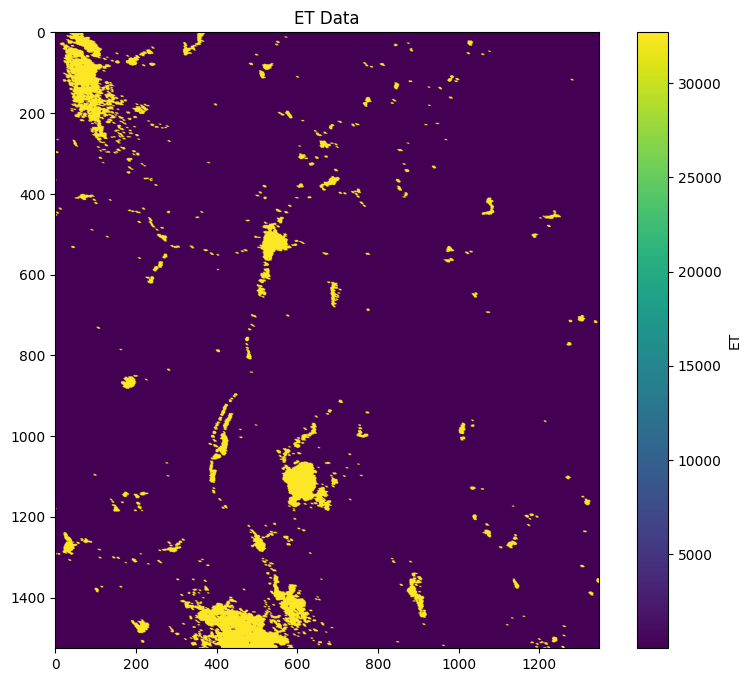

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(cropped)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

In [145]:
geometry = ''' {"type": "Polygon",
               "coordinates": [
                [[-104.88, 34.45],
                [-104.84, 34.45],
                 [-104.84, 34.49],
                [-104.88, 34.49]]]}'''

cropping_geometries = [geojson.loads(geometry)]
xds = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif')
beam = xds.rio.clip(geometries=cropping_geometries, crs=4326)

In [146]:
if beam.shape[0] == 1:
    beam = beam[0, :, :]

beam.ndim

2

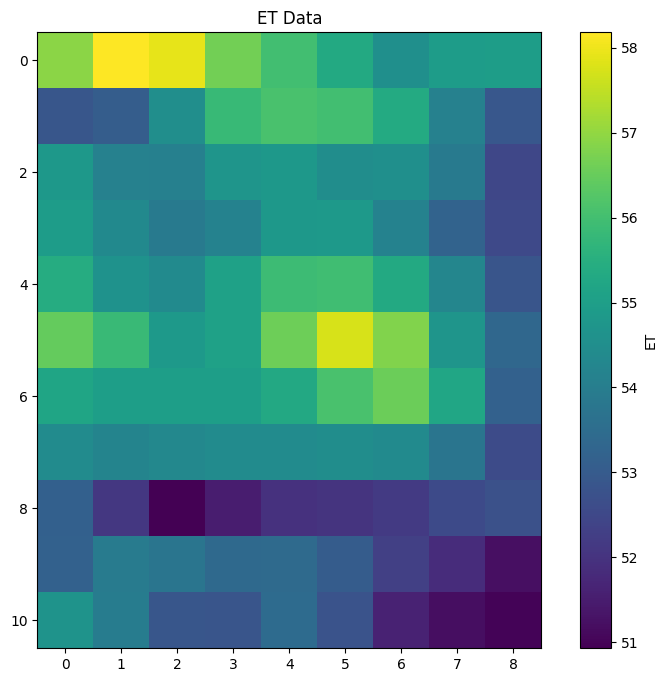

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(beam)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

In [148]:
geometry = ''' {"type": "Polygon",
               "coordinates": [
                [[-109.05, 31.333],
                [-109.045, 36.999],
                 [-103, 36.999],
                [-103, 32.002],
                [-106.618, 32.002],
                [-106.618, 31.781],
                [-108.210, 31.781],
                [-108.210, 31.333]]]}'''

cropping_geometries = [geojson.loads(geometry)]
xds = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif')
new_mexico = xds.rio.clip(geometries=cropping_geometries, crs=4326)

In [149]:
if new_mexico.shape[0] == 1:
    new_mexico = new_mexico[0, :, :]

new_mexico.ndim

2

In [ ]:
new_mexico = np.where(new_mexico >= 32700, np.nan, new_mexico)

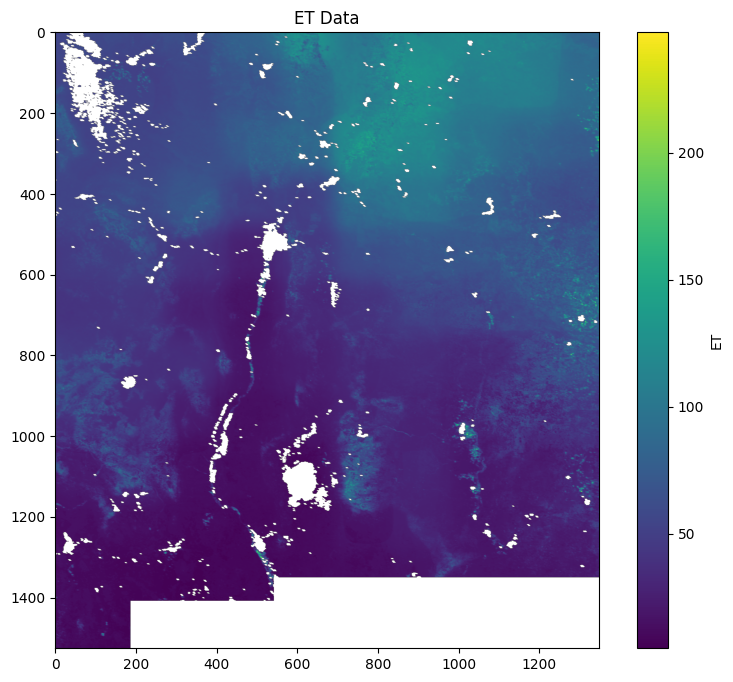

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(new_mexico)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

In [220]:
new_mexico = np.where(new_mexico >= 32700, np.nan, new_mexico)

In [221]:
#monthly average
geometry = ''' {"type": "Polygon",
               "coordinates": [
                [[-109.05, 31.333],
                [-109.045, 36.999],
                 [-103, 36.999],
                [-103, 32.002],
                [-106.618, 32.002],
                [-106.618, 31.781],
                [-108.210, 31.781],
                [-108.210, 31.333]]]}'''

cropping_geometries = [geojson.loads(geometry)]

xds = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif')
new_mexico = xds.rio.clip(geometries=cropping_geometries, crs=4326)
new_mexico = new_mexico[0, :, :]
print(new_mexico)

xds_2 = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250509_ET.tif')
new_mexico_2 = xds_2.rio.clip(geometries=cropping_geometries, crs=4326)
new_mexico_2 = new_mexico_2[0, :, :]
new_mexico += new_mexico_2
print(new_mexico_2)

xds_3 = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250517_ET.tif')
new_mexico_3 = xds_3.rio.clip(geometries=cropping_geometries, crs=4326)
new_mexico_3 = new_mexico_3[0, :, :]
new_mexico += new_mexico_3
print(new_mexico_3)

xds_4 = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250525_ET.tif')
new_mexico_4 = xds_4.rio.clip(geometries=cropping_geometries, crs=4326)
new_mexico_4 = new_mexico_4[0, :, :]
new_mexico += new_mexico_4
print(new_mexico_4)
print(new_mexico)

<xarray.DataArray (y: 1526, x: 1347)> Size: 8MB
array([[3.2700000e+04, 5.6702312e+01, 5.6705818e+01, ..., 8.1643105e+01,
        8.1770897e+01, 8.2248863e+01],
       [3.2700000e+04, 5.5770554e+01, 5.6228333e+01, ..., 8.2565765e+01,
        8.2621658e+01, 8.3737350e+01],
       [3.2700000e+04, 5.5254257e+01, 5.5906826e+01, ..., 8.2248817e+01,
        8.2425995e+01, 8.2982559e+01],
       ...,
       [1.3702225e+01, 1.3607969e+01, 1.4792874e+01, ..., 3.2700000e+04,
        3.2700000e+04, 3.2700000e+04],
       [1.5758725e+01, 1.4838384e+01, 1.3789731e+01, ..., 3.2700000e+04,
        3.2700000e+04, 3.2700000e+04],
       [1.5607399e+01, 1.7527592e+01, 1.7061396e+01, ..., 3.2700000e+04,
        3.2700000e+04, 3.2700000e+04]], shape=(1526, 1347), dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 11kB -1.214e+07 -1.214e+07 ... -1.147e+07
  * y            (y) float64 12kB 4.439e+06 4.438e+06 ... 3.677e+06 3.676e+06
    spatial_ref  int64 8B 0
Attributes:
  

In [222]:
new_mexico = np.where(new_mexico >= 400, np.nan, new_mexico)

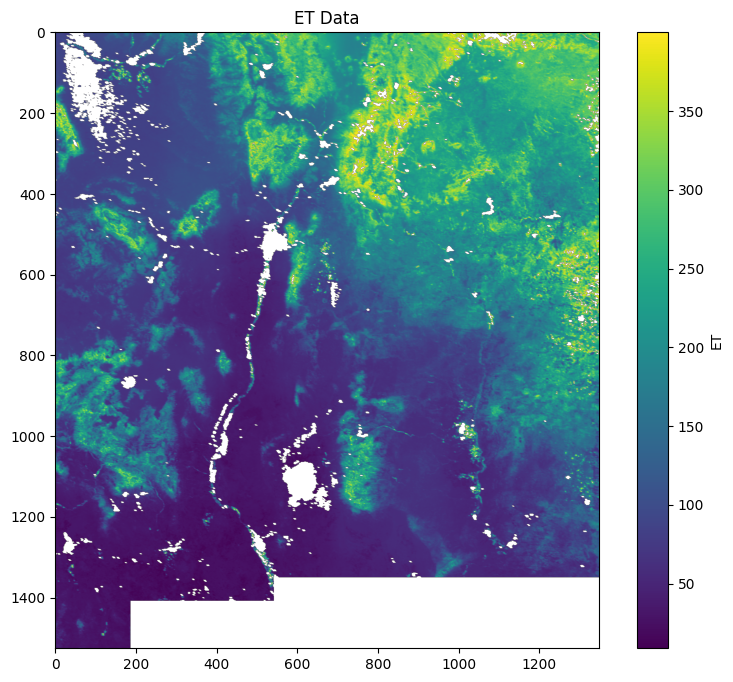

In [223]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(new_mexico)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

Choose a year and month (format YYYYMM) 202412
Choose an ET threshold (I would recommend a threshold between 50 and 150) 100


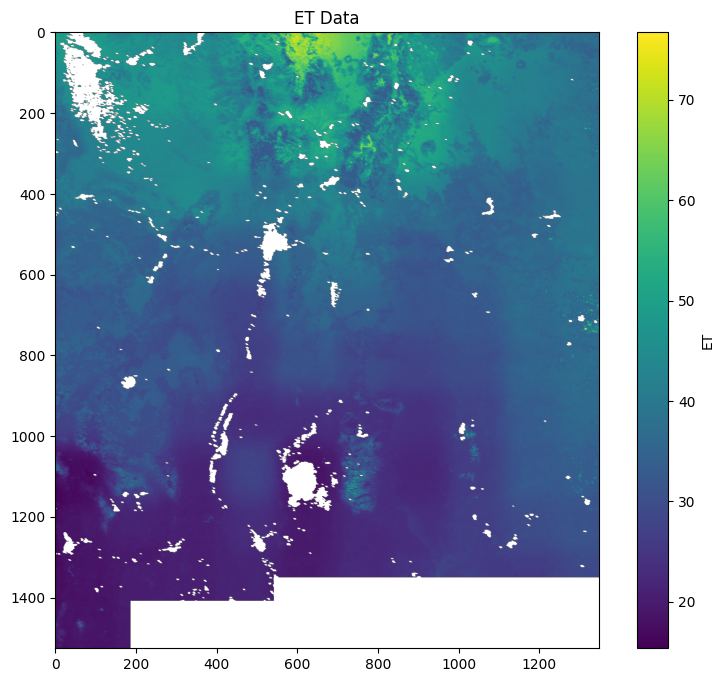

In [263]:
# monthly average
geometry = ''' {"type": "Polygon",
               "coordinates": [
                [[-109.05, 31.333],
                [-109.045, 36.999],
                [-103, 36.999],
                [-103, 32.002],
                [-106.618, 32.002],
                [-106.618, 31.781],
                [-108.210, 31.781],
                [-108.210, 31.333]]]}'''

cropping_geometries = [geojson.loads(geometry)]

xds = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif')
new_mexico = xds.rio.clip(geometries=cropping_geometries, crs=4326)
new_mexico = new_mexico[0, :, :]
new_mexico = new_mexico * 0.00000001

monthly_files = []

month = int(input("Choose a year and month (format YYYYMM)"))
str_month = str(month)

for filename in all_files:
    if str_month in filename and "_ET" in filename:
        monthly_files.append(filename)

monthly_files

for file in monthly_files:
    xds = rioxarray.open_rasterio('/Applications/MODIS_S3_downloads/' + file)
    new_mexico_2 = xds.rio.clip(geometries=cropping_geometries, crs=4326)
    new_mexico_2 = new_mexico_2[0, :, :]
    new_mexico += new_mexico_2

new_mexico /= len(monthly_files)
#print(new_mexico)

new_mexico = np.where(new_mexico >= 32700, np.nan, new_mexico)
threshold = int(input("Choose an ET threshold (I would recommend a threshold between 50 and 150)"))
new_mexico = np.where(new_mexico >= threshold, np.nan, new_mexico)

'''pet_files = []

for filename in all_files:
    if "202405" in filename and "PET" in filename:
        pet_files.append(filename)

pet_data = np.zeros((2725, 8496))

for file in pet_files:
    test_path = "/Applications/MODIS_S3_downloads/" + file
    with rasterio.open(test_path) as src:
        pet_data += src.read(1)
        pet_data = np.where(pet_data >= 32700, np.nan, pet_data)
        #print(data)

pet_data /= len(pet_files)
print(pet_data)'''

#each ET or PET file is an 8 day average
'''esi_data = data/pet_data
esi_data = np.where(esi_data >= 0.1, np.nan, esi_data)
print(esi_data)'''

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(new_mexico)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()